<a href="https://colab.research.google.com/github/jaunty0216/ForSophomoreCourse/blob/main/%E7%AC%AC%E4%BA%94%E9%80%B1_%E6%8A%8A%E8%A1%A8%E6%A0%BC%E8%B3%87%E6%96%99%E6%95%B4%E7%90%86%E4%B8%A6%E8%A6%96%E8%A6%BA%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標


---


這次的目標：**把表格資料視覺化**

# 匯入資料並整理
我們要**上傳csv檔**

In [ ]:
from google.colab import files #你在google colab寫程式，所以當然，開頭都跟google.colab有關
UploadedFile = files.upload() #資料上傳

Saving mood.csv to mood.csv


接下來要**新增讀取工具**

In [12]:
import pandas as pd #引入熊貓讀取軟體
File_Path = '/content/mood.csv' #檔案可以在左方直列的資料夾圖示中找到

try:#嘗試模式，確保可以完整執行
  OriginalFile = pd.read_csv(File_Path)#熊貓的功能，閱讀csv檔案
  print(OriginalFile)
except:
  print('Fail')

    Reference       Day   Time Feeling  MoodIndex
0           1  2025/1/1    day   happy         92
1           1  2025/1/1   noon     sad          3
2           1  2025/1/1  night    none          0
3           2  2025/1/2    day     joy         68
4           2  2025/1/2   noon   happy         93
5           2  2025/1/2  night     mad          1
6           3  2025/1/3    day    none          0
7           3  2025/1/3   noon    none          0
8           3  2025/1/3  night     joy         76
9           4  2025/1/4    day   happy         96
10          4  2025/1/4   noon     joy         72
11          4  2025/1/4  night    none          0


我要找出**快樂和愉悅**的**心情指數的加總**

In [49]:
happy = OriginalFile[OriginalFile['Feeling'] == 'happy']
joy = OriginalFile[OriginalFile['Feeling'] == 'joy']
print(happy)
print(joy)

   Reference       Day  Time Feeling  MoodIndex
0          1  2025/1/1   day   happy         92
4          2  2025/1/2  noon   happy         93
9          4  2025/1/4   day   happy         96
    Reference       Day   Time Feeling  MoodIndex
3           2  2025/1/2    day     joy         68
8           3  2025/1/3  night     joy         76
10          4  2025/1/4   noon     joy         72


但是那個**index是亂掉**的狀態

In [51]:
happy_reset = happy.reset_index(drop=True)
joy_reset = joy.reset_index(drop=True)
print(happy_reset)
print(joy_reset)

   Reference       Day  Time Feeling  MoodIndex
0          1  2025/1/1   day   happy         92
1          2  2025/1/2  noon   happy         93
2          4  2025/1/4   day   happy         96
   Reference       Day   Time Feeling  MoodIndex
0          2  2025/1/2    day     joy         68
1          3  2025/1/3  night     joy         76
2          4  2025/1/4   noon     joy         72


但我**只要MoodIndex**而已

In [53]:
happy_reset_extract = happy['MoodIndex']
joy_reset_extract = joy['MoodIndex']
print(happy_reset_extract)
print(joy_reset_extract)

0    92
1    93
2    96
Name: MoodIndex, dtype: int64
0    68
1    76
2    72
Name: MoodIndex, dtype: int64


開始**整合資料**

In [56]:
All_Data = pd.DataFrame({'happy':happy_reset_extract,'joy':joy_reset_extract})
# '來源':來源資料'
print(All_Data)

   happy  joy
0     92   68
1     93   76
2     96   72


# 來畫圖囉

enter length with cm (20 is suggested)20
enter width with cm (10 is suggested)10


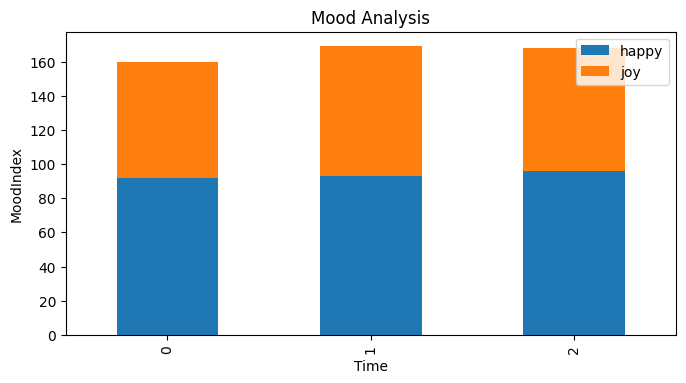

In [70]:
import matplotlib.pyplot as plt #引入畫圖軟體

length = float(input("enter length with cm (20 is suggested)"))/2.54
width = float(input("enter width with cm (10 is suggested)"))/2.54
# 因為figsize的單位是英寸，一英寸=2.54公分

All_Data.plot(kind="bar",stacked=True,figsize=(length,width))
plt.xlabel("Time")
plt.ylabel("MoodIndex")
plt.title("Mood Analysis")
plt.legend(loc="upper right") #legend在這裡的意思是"位置"，來自製圖英文
plt.show()

# 結尾
今天這些作業有**用到那些技術**呢?

*   在excel
  1. row函數的用法
*   在colab整理資料時
  1.   上傳檔案的功能
  2.   讀取資料的功能
  2.   篩選特定資料的功能
  3.   重設index的功能
  4.   從特定範圍中再取出特定資料的功能
  5.   整合資料的功能
*   在colab繪圖時
  1.   legend標示圖表位置
  2.   plot是畫出圖片的重點函數
